In [14]:
from tensorflow.keras.layers import (Input, Conv2D, Flatten, MaxPooling2D,
                                     Dense, Dropout, Concatenate)
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import os
import pickle

In [15]:
PATH2PROJECT = "/content/drive/MyDrive/Projects/EyeTracker/"
CHOSEN_INPUTS = [0, 1, 2, 6, 7, 8, 9]

In [16]:
x1 = []
x2 = []
y = []

in_blink_out_fol = PATH2PROJECT + "dataset/1/in_blink_out/"

with open(in_blink_out_fol + "x1.pickle", "rb") as f:
    x1 = pickle.load(f)
with open(in_blink_out_fol + "x2.pickle", "rb") as f:
    x2 = pickle.load(f)
with open(in_blink_out_fol + "y.pickle", "rb") as f:
    y = pickle.load(f)

In [17]:
x2_chs_inp = x2[:, CHOSEN_INPUTS]

In [18]:
# model5
input1 = Input(x1.shape[1:])
layer = Conv2D(16, (5, 5), (1, 1), "same", activation="relu")(input1)
layer = MaxPooling2D((2, 2), (2, 2))(layer)

layer = Conv2D(32, (5, 5), (1, 1), "same", activation="relu")(layer)
layer = MaxPooling2D((2, 2), (2, 2))(layer)

layer = Conv2D(64, (3, 3), (1, 1), activation="relu")(layer)
layer = MaxPooling2D((2, 2), (2, 2))(layer)

layer = Flatten()(layer)

layer = Dense(256, "relu")(layer)

input2 = Input(x2_chs_inp.shape[1:])
layer = Concatenate()([layer, input2])

layer = Dense(128, "relu")(layer)

layer = Dense(64, "relu")(layer)

layer = Dense(32, "relu")(layer)

layer = Dense(8 ,"relu")(layer)

output_layer = Dense(y.max() + 1, "softmax")(layer)

input_layers = [input1, input2]

model = Model(inputs=input_layers, outputs=output_layer)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="acc")

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 48, 44, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 48, 44, 16)   416         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 24, 22, 16)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 24, 22, 32)   12832       max_pooling2d_6[0][0]            
____________________________________________________________________________________________

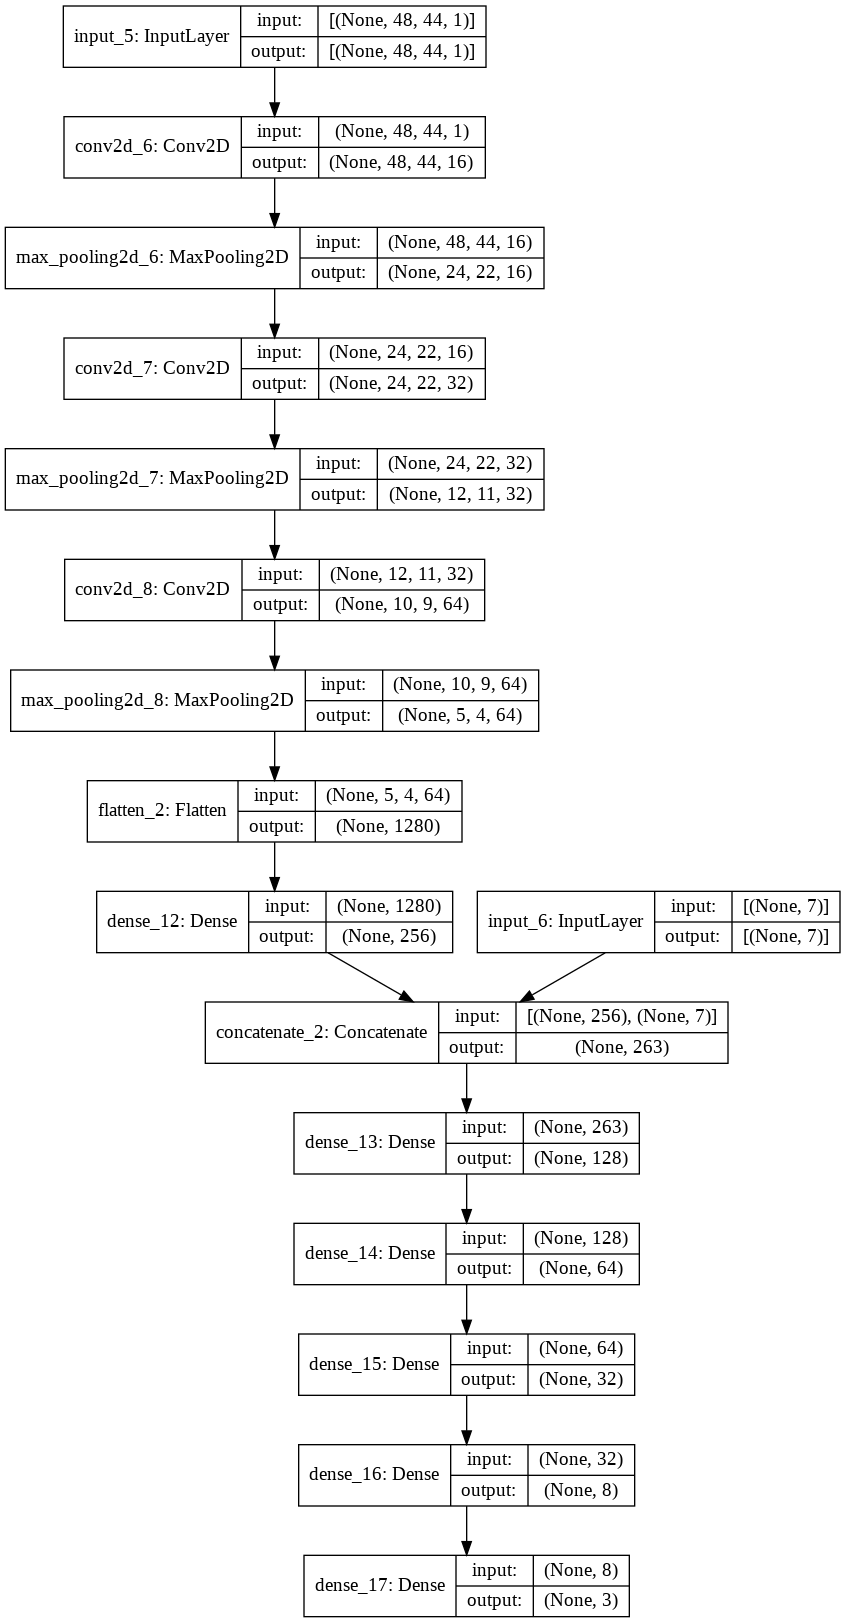

In [19]:
plot_model(model, show_shapes=True)

In [20]:
models_numbers = []
models_dir = PATH2PROJECT + "models/in_blink_out/raw/"
models_name = os.listdir(models_dir)
if models_name:
    for model_name in models_name:
        model_num = int(model_name[5:])
        models_numbers.append(model_num)
    max_num = max(models_numbers)
else:
  max_num = 0
model.save(models_dir + f"model{max_num+1}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/EyeTracker/models/in_blink_out/raw/model1/assets
